Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import joblib

Loading the datasets

In [2]:
df_aparts = pd.read_csv('apartments.csv')
df_aparts.columns

Index(['Unnamed: 0', 'title', 'location', 'bedrooms', 'bathrooms', 'price',
       'rate'],
      dtype='object')

In [3]:
df_rentapts = pd.read_csv('rent_apts.csv')
df_rentapts.columns

Index(['Agency', 'Neighborhood', 'Price', 'link', 'sq_mtrs', 'Bedrooms',
       'Bathrooms'],
      dtype='object')

In [4]:
df_aparts.head(5)

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [5]:
df_rentapts.head(5)

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


Exploring the dataset

In [6]:
#Shape of the datasets, rows and columns respectively.
df_aparts.shape

(2520, 7)

In [7]:
df_rentapts.shape

(1848, 7)

In [8]:
df_aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2520 non-null   int64 
 1   title       2520 non-null   object
 2   location    2144 non-null   object
 3   bedrooms    2520 non-null   int64 
 4   bathrooms   2520 non-null   int64 
 5   price       2520 non-null   object
 6   rate        2520 non-null   object
dtypes: int64(3), object(4)
memory usage: 137.9+ KB


In [9]:
df_rentapts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [10]:
df_aparts.columns
df_aparts.isnull().sum()

Unnamed: 0      0
title           0
location      376
bedrooms        0
bathrooms       0
price           0
rate            0
dtype: int64

In [11]:
df_rentapts.columns
df_rentapts.isnull().sum()

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [12]:
#describe the data
df_rentapts.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


In [13]:
#describe the data
df_aparts.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2520.0,1259.500000,727.605662,0.0,629.75,1259.5,1889.25,2519.0
bedrooms,2520.0,2.551190,0.922868,1.0,2.00,3.0,3.00,4.0
bathrooms,2520.0,2.450794,0.976480,1.0,2.00,2.0,3.00,5.0


# Data cleaning and wrangling

df_aparts

In [14]:
#drop the first column (Unnamed: 0) 
df_aparts.drop('Unnamed: 0', axis=1, inplace=True)
df_aparts.columns

Index(['title', 'location', 'bedrooms', 'bathrooms', 'price', 'rate'], dtype='object')

In [15]:
print(df_aparts['title'].head(10))

0      3 Bedroom Apartment / Flat to rent in Riverside
1     3 Bedroom Apartment / Flat to rent in Kileleshwa
2          3 Bedroom Apartment / Flat to rent in Nyali
3      3 Bedroom Apartment / Flat to rent in Lavington
4     1 Bedroom Apartment / Flat to rent in Kileleshwa
5    4 Bedroom Apartment / Flat to rent in Kahawa W...
6       2 Bedroom Apartment / Flat to rent in Kilimani
7      3 Bedroom Apartment / Flat to rent in Westlands
8          1 Bedroom Apartment / Flat to rent in Nyali
9       4 Bedroom Apartment / Flat to rent in Muthaiga
Name: title, dtype: object


In [16]:
import re
# Cleaning the location
df_aparts['title'] = df_aparts['title'].apply(lambda x: re.sub(r'^\d+ Bedroom Apartment / Flat to rent in ', '', x))
print(df_aparts['title'])
print('Number of unique values:', df_aparts['title'].nunique())

0           Riverside
1          Kileleshwa
2               Nyali
3           Lavington
4          Kileleshwa
            ...      
2515         Kilimani
2516            Nyali
2517    Spring Valley
2518         Muthaiga
2519        Westlands
Name: title, Length: 2520, dtype: object
Number of unique values: 12


In [17]:
df_aparts = df_aparts.drop('location', axis=1)
df_aparts.isnull().sum()
num_none_values = df_aparts.isnull().sum().sum()
print("Number of None values: ", num_none_values)

Number of None values:  0


In [18]:
#Renaming the columns
df_aparts.rename(columns={'title': 'Town'}, inplace=True)
df_aparts.rename(columns={'bedrooms': 'Bedrooms'}, inplace=True)
df_aparts.rename(columns={'bathrooms': 'Bathrooms'}, inplace=True)
df_aparts.rename(columns={'price': 'Price'}, inplace=True)
df_aparts.columns

Index(['Town', 'Bedrooms', 'Bathrooms', 'Price', 'rate'], dtype='object')

In [19]:
print(df_aparts[['rate', 'Price']])

           rate     Price
0     Per Month   200 000
1     Per Month    70 000
2     Per Month    38 000
3     Per Month    80 000
4     Per Month   110 000
...         ...       ...
2515  Per Month    75 000
2516  Per Month    45 000
2517  Per Month    65 000
2518  Per Month   300 000
2519  Per Month   100 000

[2520 rows x 2 columns]


In [20]:
# Remove non-numeric characters and whitespace from the "Price" column
df_aparts['Price'] = df_aparts['Price'].str.replace('[^\d]+', '', regex=True)
# Convert the column to integers
df_aparts['Price'] = pd.to_numeric(df_aparts['Price'], errors='coerce').astype('Int64')
# Print the rate and Price columns to check the output
print(df_aparts[['rate', 'Price']])

           rate   Price
0     Per Month  200000
1     Per Month   70000
2     Per Month   38000
3     Per Month   80000
4     Per Month  110000
...         ...     ...
2515  Per Month   75000
2516  Per Month   45000
2517  Per Month   65000
2518  Per Month  300000
2519  Per Month  100000

[2520 rows x 2 columns]


In [21]:
# Drop rows with NaN values in the "Price" column
df_aparts.dropna(subset=['Price'], inplace=True)
# Print the rate and Price columns to check the output
print(df_aparts[['rate', 'Price']])

           rate   Price
0     Per Month  200000
1     Per Month   70000
2     Per Month   38000
3     Per Month   80000
4     Per Month  110000
...         ...     ...
2515  Per Month   75000
2516  Per Month   45000
2517  Per Month   65000
2518  Per Month  300000
2519  Per Month  100000

[2520 rows x 2 columns]


In [22]:
# Print the unique values for is called "Rate"
print(df_aparts['rate'].unique())

['Per Month' 'Per Day']


In [23]:
np_days = len(df_aparts[df_aparts['rate'] == 'Per Month'])
print("For Months: ", np_days)
np_months = len(df_aparts[df_aparts['rate'] == 'Per Day'])
print("For Days: ", np_months)

For Months:  2395
For Days:  125


In [24]:
df_aparts.loc[df_aparts['rate'] == 'Per Day', 'Price'] *= 30
print(df_aparts['Price'].head(10))
df_aparts = df_aparts.drop('rate', axis=1)

0    200000
1     70000
2     38000
3     80000
4    110000
5     57750
6     65000
7     78000
8    150000
9    300000
Name: Price, dtype: Int64


In [25]:
df_aparts['Bedrooms'] = df_aparts['Bedrooms'].astype(int)
df_aparts['Bathrooms'] = df_aparts['Bathrooms'].astype(int)
df_aparts['Price'] = df_aparts['Price'].astype(int)
print(df_aparts.dtypes)

Town         object
Bedrooms      int32
Bathrooms     int32
Price         int32
dtype: object


In [26]:
#check for missing values
df_aparts.isnull().sum()

Town         0
Bedrooms     0
Bathrooms    0
Price        0
dtype: int64

df_rentapts 

In [27]:
#the price column is an object type, we shall convert it to float
#first we shall remove the KSh sign and the comma (KSh 50,000)
df_rentapts['Price'].str.replace('KSh','',regex=True).str.replace(',','')

0        155000
1        100000
2         75000
3        135000
4         50000
         ...   
1843     180000
1844     180000
1845     180000
1846     180000
1847     180000
Name: Price, Length: 1848, dtype: object

In [28]:
df_rentapts['Price'] = df_rentapts['Price'].str.replace('KSh','',regex=True).str.replace(',','').astype(float)

In [29]:
df_rentapts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   float64
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(4), object(3)
memory usage: 101.2+ KB


In [30]:
#Check for null values
df_rentapts.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1848.0,97343.881494,40241.322051,12000.0,70000.0,95000.0,130000.0,280000.0
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


<Axes: >

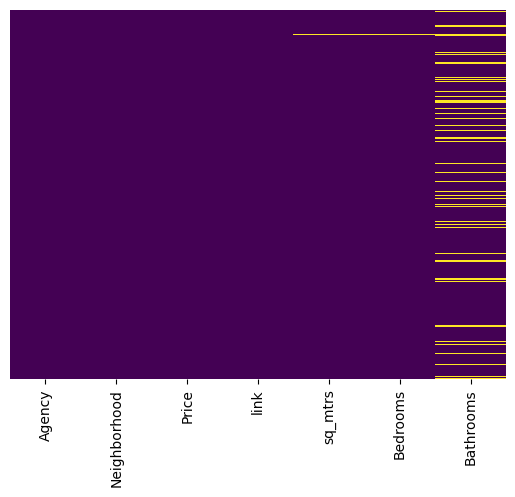

In [31]:
sns.heatmap(df_rentapts.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
df_rentapts.dropna(subset=['sq_mtrs','Bedrooms'],inplace=True)
df_rentapts.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [33]:
#check for houses that have missing bathrooms as null values
df_rentapts[df_rentapts['Bathrooms'].isnull()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands",150000.0,/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road",85000.0,/listings/4-bedroom-apartment-for-rent-thika-r...,4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa",16000.0,/listings/1-bedroom-apartment-for-rent-ruaka-3...,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands",175000.0,/listings/3-bedroom-apartment-for-rent-general...,3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands",175000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North",180000.0,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000.0,/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN


In [34]:
#we see the bathroom column has a good correlation with the price column
#We shall group the houses by the number of bedrooms and fill the missing values
#with the mean of the bathrooms in each group, rounded to whole numbers
df_rentapts.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

0       4.0
1       4.0
2       5.0
3       4.0
4       3.0
       ... 
1843    3.0
1844    2.0
1845    5.0
1846    4.0
1847    2.0
Name: Bathrooms, Length: 1845, dtype: float64

In [35]:
df_rentapts['Bathrooms'] = df_rentapts.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

In [36]:
#check for missing values
df_rentapts.isnull().sum()

Agency          0
Neighborhood    0
Price           0
link            0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

In [37]:
#Extract the town from neighborhood column
#for further analysis
df_rentapts['Town'] = df_rentapts['Neighborhood'].str.split(',').str[-1]

In [38]:
#check for the towns
df_rentapts['Town'].nunique()

37

In [39]:


#Notice that we won't need some of the columns to train our model; those are Agency, Neighborhood, and links.
#You also notice that sq_mtrs column is not correlated with any of the columns in our data.
#Remove non-required columns
del df_rentapts["Agency"]
del df_rentapts["link"] 
del df_rentapts["Neighborhood"] 

df_rentapts.columns

Index(['Price', 'sq_mtrs', 'Bedrooms', 'Bathrooms', 'Town'], dtype='object')

In [40]:
df_aparts['sq_mtrs'] = pd.Series(dtype='int64')
df_aparts.columns

Index(['Town', 'Bedrooms', 'Bathrooms', 'Price', 'sq_mtrs'], dtype='object')

In [41]:
df_rentapts.columns

Index(['Price', 'sq_mtrs', 'Bedrooms', 'Bathrooms', 'Town'], dtype='object')

In [42]:
# Define the new order of columns to look like the other dataset
new_order = ['Town','sq_mtrs', 'Bedrooms', 'Bathrooms', 'Price']
# Reorder the columns of the DataFrame
df_aparts = df_rentapts.reindex(columns=new_order)
df_rentapts = df_rentapts.reindex(columns=new_order)

In [43]:
df_rentapts.columns
df_rentapts.head(5)

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
0,Westlands,4.0,4.0,4.0,155000.0
1,Dagoretti North,300.0,3.0,4.0,100000.0
2,Dagoretti North,3.0,3.0,5.0,75000.0
3,Dagoretti North,227.0,3.0,4.0,135000.0
4,Embakasi,3.0,3.0,3.0,50000.0


Merged Dataset

In [44]:
#Merge the dataset
# Concatenate the datasets vertically
merged_df = pd.concat([df_aparts, df_rentapts], axis=0, ignore_index=True)
merged_df.columns

Index(['Town', 'sq_mtrs', 'Bedrooms', 'Bathrooms', 'Price'], dtype='object')

In [45]:
#Explore the merged dataset
merged_df.shape

(3690, 5)

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Town       3690 non-null   object 
 1   sq_mtrs    3690 non-null   float64
 2   Bedrooms   3690 non-null   float64
 3   Bathrooms  3690 non-null   float64
 4   Price      3690 non-null   float64
dtypes: float64(4), object(1)
memory usage: 144.3+ KB


In [47]:
merged_df.head(5)

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
0,Westlands,4.0,4.0,4.0,155000.0
1,Dagoretti North,300.0,3.0,4.0,100000.0
2,Dagoretti North,3.0,3.0,5.0,75000.0
3,Dagoretti North,227.0,3.0,4.0,135000.0
4,Embakasi,3.0,3.0,3.0,50000.0


In [48]:
#check for the towns
merged_df['Town'].nunique()

37

In [49]:
# Sort the DataFrame by the 'town' column in alphabetical order
merged_df = merged_df.sort_values('Town')
merged_df.head(5)

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
135,Athi River,3.0,3.0,2.0,35000.0
126,Athi River,3.0,3.0,2.0,35000.0
2056,Athi River,3.0,3.0,3.0,45000.0
37,Athi River,1.0,1.0,1.0,17000.0
2057,Athi River,3.0,3.0,3.0,45000.0


In [50]:
unique_towns = merged_df['Town'].unique()
print(unique_towns)

[' Athi River' ' Dagoretti North' ' Dagoretti South' ' Eldoret North'
 ' Embakasi' ' Kabete' ' Kajiado North' ' Kangundo' ' Kasarani' ' Kiambaa'
 ' Kiambu Constituency' ' Kiambu Road' ' Kiambu Town' ' Kikuyu'
 ' Kilifi South' ' Kisauni' ' Kisumu Central' ' Kisumu West' ' Langata'
 ' Makadara' ' Milimani' ' Mombasa CBD' ' Mombasa Road' ' Muthaiga'
 ' Mvita' ' Ngong' ' Ngong Road' ' Nyali' ' Roysambu' ' Ruaraka' ' Ruiru'
 ' Starehe' ' Thika' ' Thika East' ' Thika Road' ' Thindigua' ' Westlands']


In [51]:
# Replace 'North', and 'South' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' North', '').str.replace(' South', '')
# Replace 'East' and 'West' from all the values in the 'town' column except Westlands
merged_df['Town'] = merged_df['Town'].apply(lambda x: x if x == ' Westlands' else x.replace(' East', '').replace(' West', ''))
# Replace 'Road' and 'Town' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' Road', '').str.replace(' Town', '')
unique_towns = merged_df['Town'].unique()
# Replace 'Constituency' and 'Central' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' Constituency', '').str.replace(' Central', '')
unique_towns = merged_df['Town'].unique()
# Replace 'CBD' and 'Central' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' CBD', '').str.replace(' Central', '')
# Replace 'space' at the beginning from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.lstrip()
unique_towns = merged_df['Town'].unique()
merged_df = merged_df.sort_values('Town')
print(unique_towns)

['Athi River' 'Dagoretti' 'Eldoret' 'Embakasi' 'Kabete' 'Kajiado'
 'Kangundo' 'Kasarani' 'Kiambaa' 'Kiambu' 'Kikuyu' 'Kilifi' 'Kisauni'
 'Kisumu' 'Langata' 'Makadara' 'Milimani' 'Mombasa' 'Muthaiga' 'Mvita'
 'Ngong' 'Nyali' 'Roysambu' 'Ruaraka' 'Ruiru' 'Starehe' 'Thika'
 'Thindigua' 'Westlands']


In [52]:
missing_mask = merged_df['sq_mtrs'].isna()

for index, row in merged_df[missing_mask].iterrows():
    town = row['Town']
    bedrooms = row['Bedrooms']
    bathrooms = row['Bathrooms']
    similar_rows = merged_df[(merged_df['Town'] == town) & (merged_df['Bedrooms'] == bedrooms) & (merged_df['Bathrooms'] == bathrooms)]
    
    if len(similar_rows) == 0:
        similar_rows = merged_df[(merged_df['Bedrooms'] == bedrooms) & (merged_df['Bathrooms'] == bathrooms)]
    
    if len(similar_rows) > 0:
        merged_df.at[index, 'sq_mtrs'] = similar_rows['sq_mtrs'].mean()

# Check for missing values
missing_mask = merged_df['sq_mtrs'].isna()
if missing_mask.any():
    print("Rows with missing values in 'sq_mtrs' column:")
    print(merged_df[missing_mask])
else:
    print("All missing values in 'sq_mtrs' column have been filled")

All missing values in 'sq_mtrs' column have been filled


In [53]:
# Save the merged dataset
merged_df.to_csv('merged_dataset.csv', index=False)

# Visualising the data




df_aparts

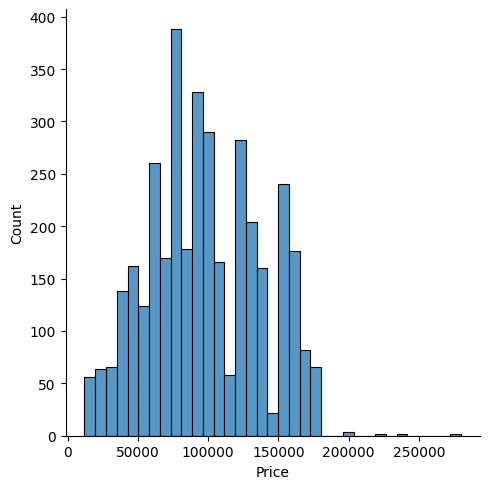

In [54]:
#Lets first check the distribution of the Price column
sns.displot(merged_df['Price'])

<Axes: xlabel='Bedrooms', ylabel='Price'>

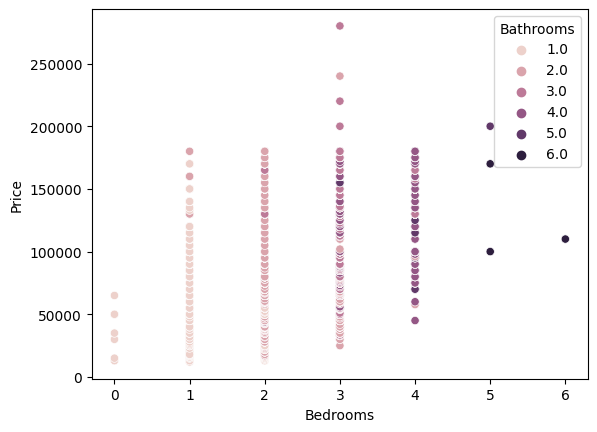

In [55]:
#scatterplot for price  and Bedrooms colored by Bathrooms
sns.scatterplot(x='Bedrooms',y='Price',data=df_aparts,hue='Bathrooms')

df_rentapts

In [56]:
#we can see that the price column is right skewed
#lets check the houses that are outliers (200000 and above))
df_rentapts[merged_df['Price']>=200000]

C:\Users\Kagaba\AppData\Local\Temp\ipykernel_13260\3771522022.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rentapts[merged_df['Price']>=200000]


,Town,sq_mtrs,Bedrooms,Bathrooms,Price
14,Westlands,3.0,3.0,3.0,220000.0
34,Westlands,3.0,3.0,3.0,200000.0
64,Westlands,3.0,3.0,3.0,280000.0
93,Athi River,2.0,2.0,2.0,28000.0
155,Kiambaa,45.0,2.0,2.0,38000.0


## Conclusion
The houses with more Bedrooms and Bathrooms are more expensive


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3690 entries, 135 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Town       3690 non-null   object 
 1   sq_mtrs    3690 non-null   float64
 2   Bedrooms   3690 non-null   float64
 3   Bathrooms  3690 non-null   float64
 4   Price      3690 non-null   float64
dtypes: float64(4), object(1)
memory usage: 302.0+ KB


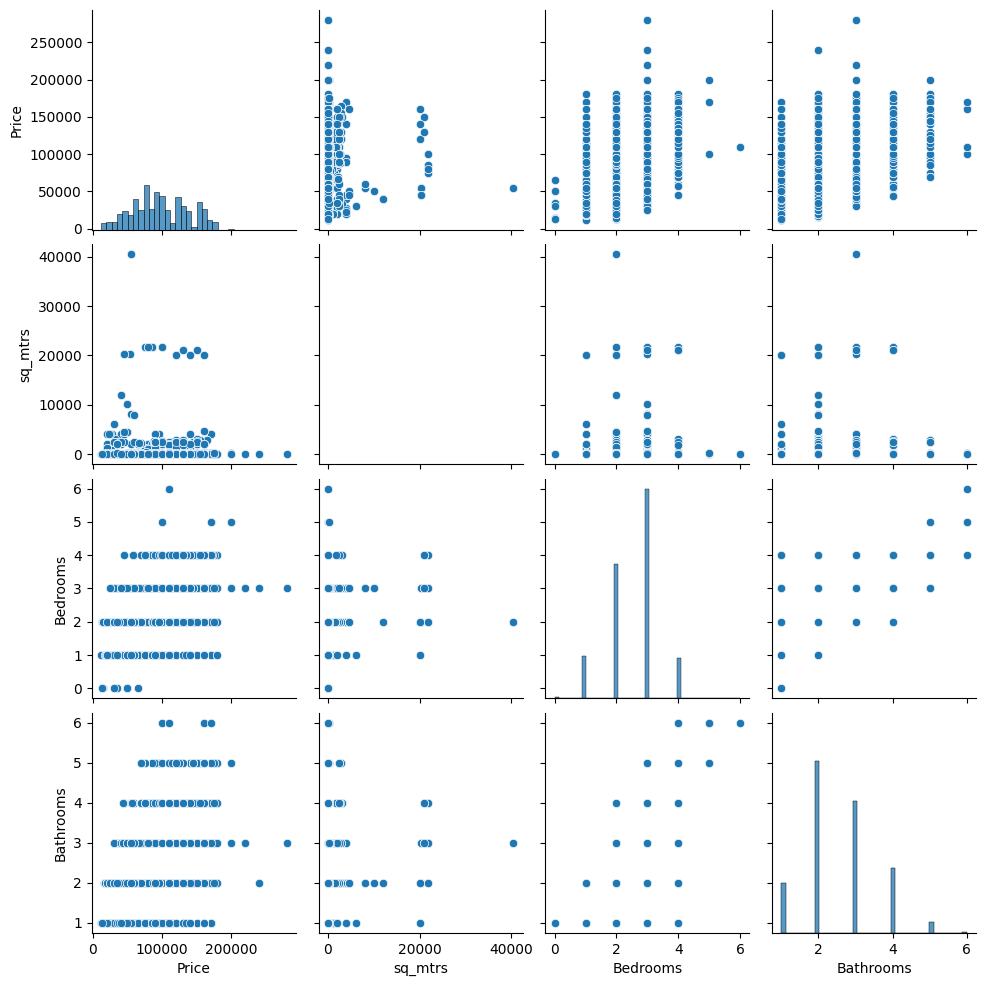

In [58]:
#generate a pairplot on price, Bedrooms, Bathrooms and sq_mtrs
sns.pairplot(merged_df[['Price','sq_mtrs','Bedrooms','Bathrooms','Town']])

In [60]:
#check for the towns
merged_df['Town'].nunique()

29

<Axes: xlabel='sq_mtrs', ylabel='Price'>

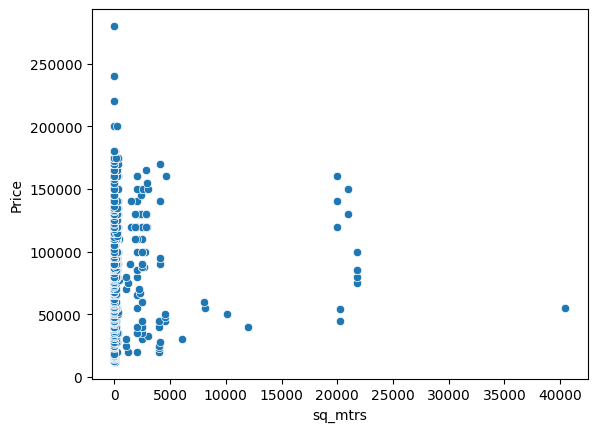

In [59]:
#The houses with more Bedrooms and bathrooms are more expensive
#Lets check the scatterplot of the sq_mtrs column with price
sns.scatterplot(x='sq_mtrs',y='Price',data=df_rentapts)

<Axes: xlabel='Town'>

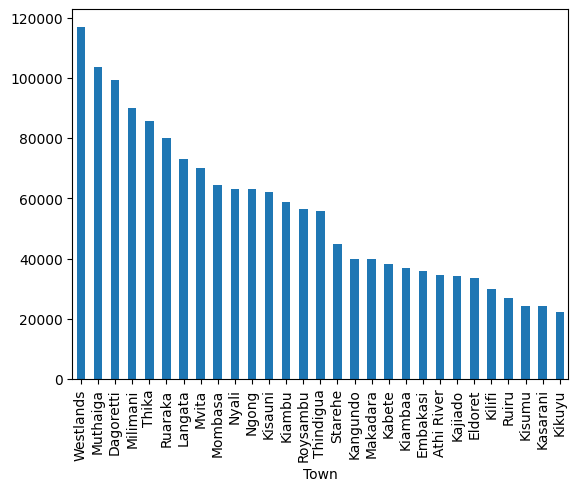

In [61]:
#grouby the towns and get the mean price,plot it
merged_df.groupby('Town')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

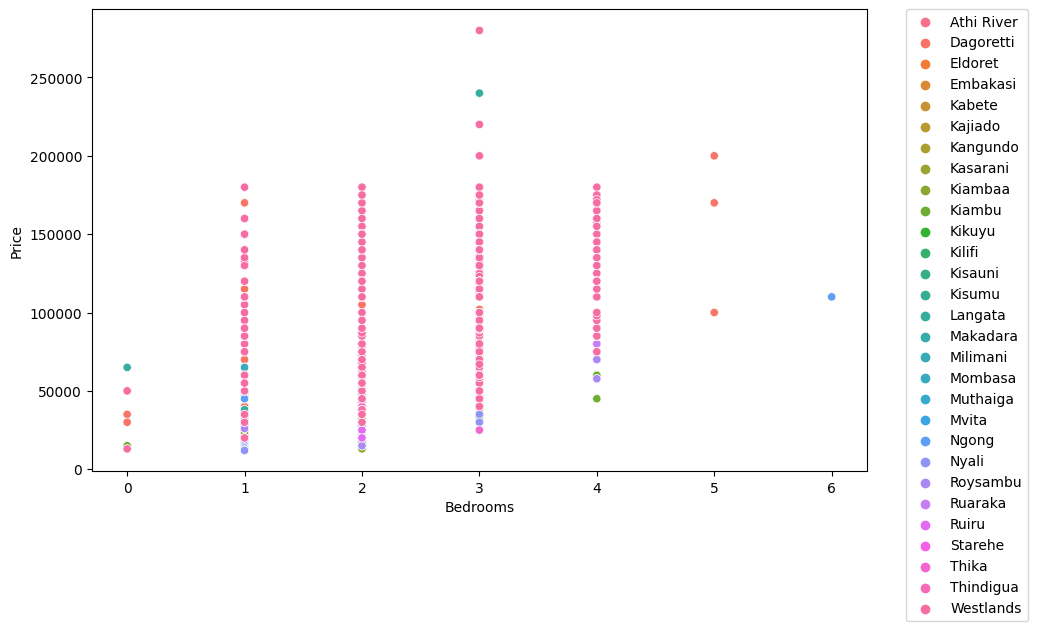

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bedrooms',y='Price',data=merged_df,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

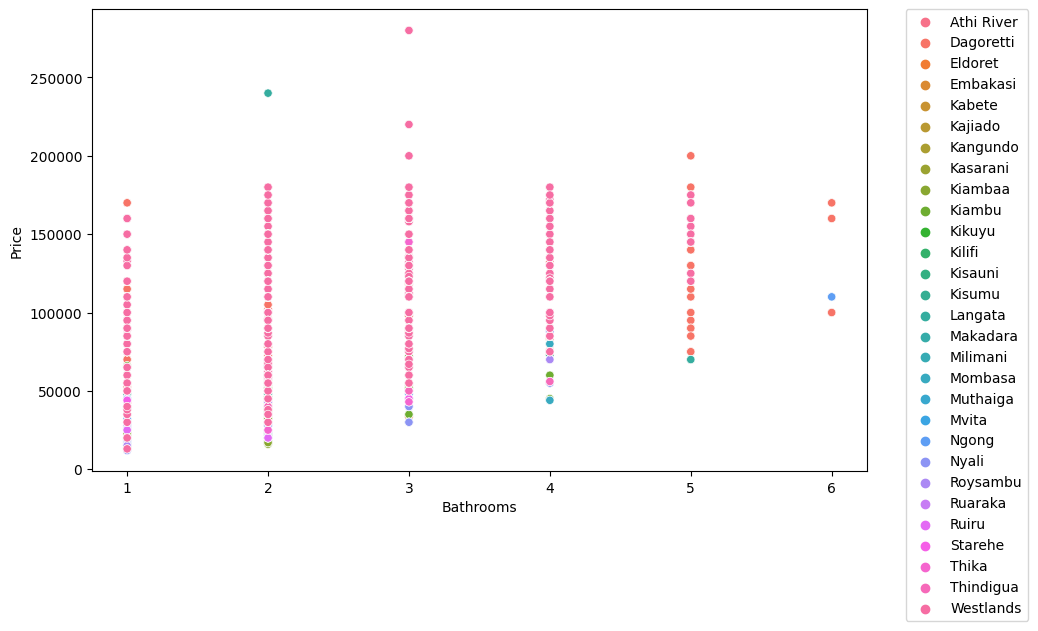

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bathrooms',y='Price',data=merged_df,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [64]:
#Lets check the houses with the most bedrooms
merged_df[merged_df['Bedrooms']==merged_df['Bedrooms'].max()]

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
1161,Ngong,6.0,6.0,6.0,110000.0
3006,Ngong,6.0,6.0,6.0,110000.0


# Set features and labels

In [65]:
X = merged_df[["Bedrooms","sq_mtrs", "Bathrooms","Town"]]
y = merged_df[["Price"]]

# Define the model and train it

In [66]:
# Extract the numerical features and categorical feature
X_num = merged_df[["sq_mtrs","Bedrooms", "Bathrooms"]]
X_cat = merged_df[["Town"]]

In [67]:
# Create an instance of the OneHotEncoder class and fit it to the categorical feature
ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder()

In [68]:
# Transform the categorical feature using the fitted OneHotEncoder
X_cat_encoded = ohe.transform(X_cat).toarray()

In [69]:
# Combine the numerical and encoded categorical features
X = np.concatenate((X_num, X_cat_encoded), axis=1)
y = merged_df[["Price"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the regression model using the training data
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

# Prediction and accuracy

In [70]:
#Predictions using the testing set 
y_pred = clf.predict(X_test)

# #Example of few predictions
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# five_pred= clf.predict(X_test)[:5]

# five_pred

In [71]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)


(738, 32)
(738, 1)
(738,)


In [72]:
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# str(y_test[:5])

In [73]:
# #Checking the accuracy of the model using MSE,MAE and R-squared error

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R-squared score: ', r2_score(y_test, y_pred))


Mean squared error:  691690399.0958012
Root Mean Squared error:  26300.007587371554
Mean absolute error:  18767.189630243498
R-squared score:  0.546789232552213


In [74]:
# trying new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3, loss="squared_error"))


In [75]:
#Checking the accuracy of a model
clf.fit(X_train, y_train)
forestPred = clf.predict(X_test)
forestScores = clf.score(X_test, y_test)
forestScores

e:\Documents\Subjects\Year 3\SUMMATIVES\AI\HousingModelKenya\SUMMATIVE_AI_Group17_KenyaHousing\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-223.56454216894522

In [76]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

26300.007587371554

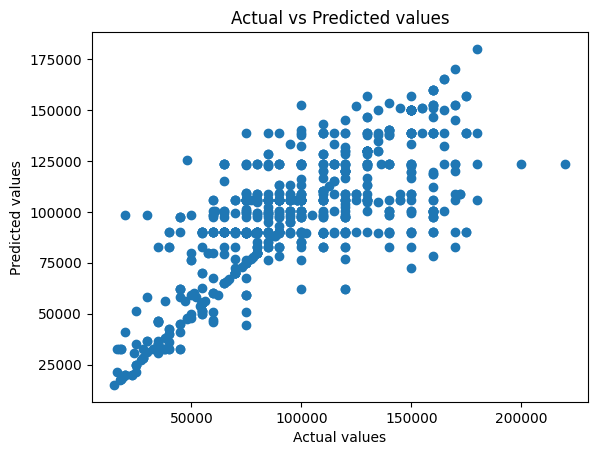

In [77]:
#using a scatter plot to visualize how well the model is perfoming
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()


In [78]:
# from sklearn.model_selection import cross_val_score
#  #Cross-validate the model
#  #Perform cross-validation on the model
# scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-scores)

#  # Display the cross-validation scores
# print('Cross-Validation Scores:', rmse_scores)
# print('Mean:', rmse_scores.mean())
# print('Standard deviation:', rmse_scores.std())


In [79]:
joblib.dump(clf, 'the_model.joblib')

['house_price_prediction.joblib']